In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df = pd.read_csv('news.csv')
df.head()

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
import string

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# from nltk.stem import LancasterStemmer
# lancaster = LancasterStemmer()
# from nltk.stem import SnowballStemmer
# snowball = SnowballStemmer('english')

# from nltk.stem import PorterStemmer
# porter = PorterStemmer()   ##suffix stripping

In [4]:
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

In [5]:
def lower(text):
    new_text = text.lower()
    return new_text

In [6]:
def remove_punc(text):
    new_text = re.sub(r'[^\w\s]', '',text)
    return new_text    

In [7]:
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    new_text = ' '.join(word for word in text.split() if word not in stop)
    return new_text

In [8]:
df['new_title'] = df['title'].apply(lambda x: x.lower())

In [9]:
df['new_title'] = df['new_title'].apply(remove_punc)

In [10]:
df['new_title'] = df['new_title'].apply(remove_stopwords)

In [11]:
df['new_text'] = df['text'].apply(lambda x: x.lower())

In [12]:
df['new_text'] = df['new_text'].apply(remove_punc)

In [13]:
df['new_text'] = df['new_text'].apply(remove_stopwords)

In [14]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from PIL import Image

In [15]:
stopwords = set(STOPWORDS)

In [16]:
fake_text = df[df['label'] == 'FAKE']

In [17]:
real_text = df[df['label'] == 'REAL']

In [18]:
real_txt = real_text['new_text']

In [19]:
real_title = real_text['new_title']

In [20]:
real_title = str(real_title)

In [21]:
real_txt = str(real_txt)

In [22]:
fake_txt = fake_text['new_text']

In [23]:
fake_title = fake_text['new_title']

In [24]:
fake_title = str(fake_title)

In [25]:
fake_txt = str(fake_txt)

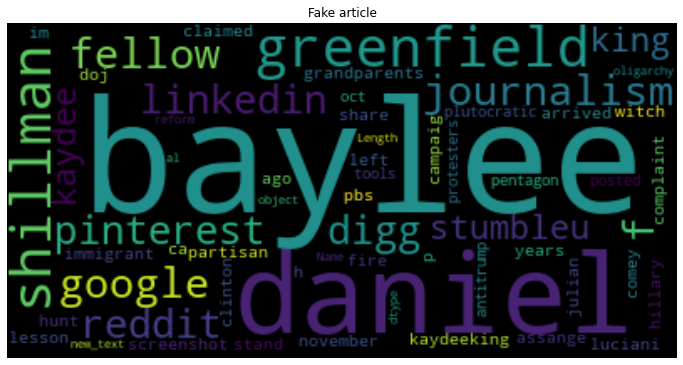

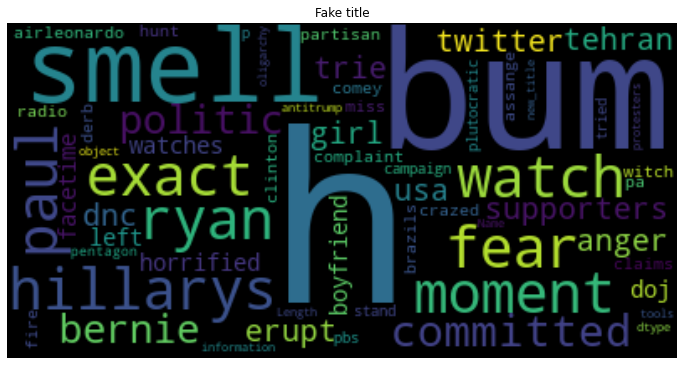

In [26]:
plt.figure(figsize=(12,12))
wc = WordCloud().generate(fake_txt)
plt.imshow(wc, interpolation='bilinear' )
plt.axis('off')
plt.title('Fake article')
plt.show()

plt.figure(figsize=(12,12))
wc = WordCloud().generate(fake_title)
plt.imshow(wc, interpolation='bilinear' )
plt.axis('off')
plt.title('Fake title')
plt.show()

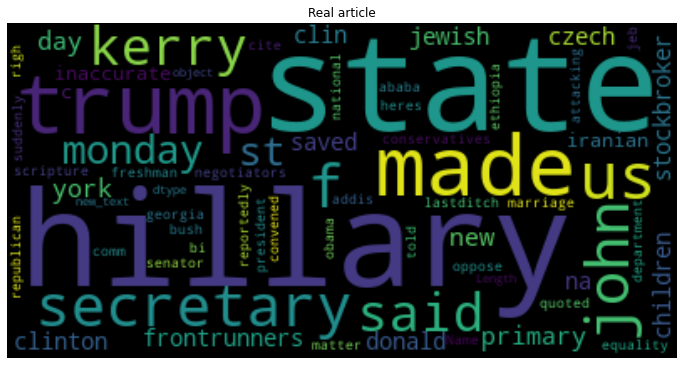

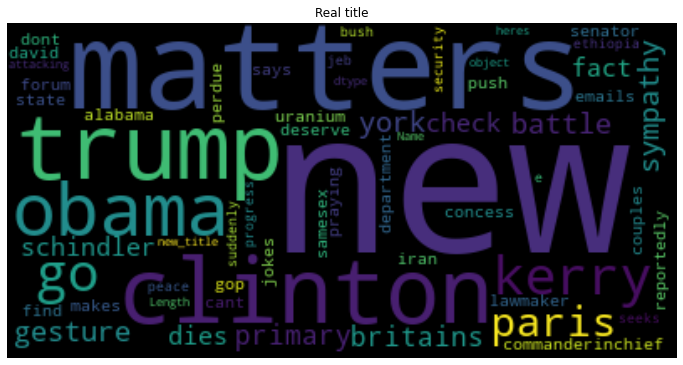

In [27]:
plt.figure(figsize=(12,12))
wc = WordCloud(stopwords=stopwords).generate(real_txt)
plt.imshow(wc, interpolation='bilinear' )
plt.axis('off')
plt.title('Real article')
plt.show()

plt.figure(figsize=(12,12))
wc = WordCloud(stopwords=stopwords).generate(real_title)
plt.imshow(wc, interpolation='bilinear' )
plt.axis('off')
plt.title("Real title")
plt.show()

In [28]:
training_data = df[['new_title','label']]

In [29]:
len(df)

6335

In [30]:
training_data['label'] = training_data['label'].replace({'FAKE': 0, 'REAL':1})

C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
train = training_data[0:5068]

In [32]:
test = training_data[5068:6335]

In [33]:
train2 = training_data[0:5068]

In [34]:
test2 = training_data[5068:6335]

In [35]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()

In [36]:
train_data = vec.fit_transform(train['new_title'])

In [37]:
train_data2 = vec.fit_transform(train2['new_title'])

In [38]:
test_data = vec.transform(test['new_title'])

In [39]:
test_data2 = vec.transform(test2['new_title'])

In [40]:
X_train = train_data
X_test = test_data
y_train = train.label
y_test = test.label

In [41]:
X_train2 = train_data.toarray()
X_test2 = test_data.toarray()
y_train2 = train.label
y_test2 = test.label

In [42]:
nb = GaussianNB()

In [43]:
lr = LogisticRegression()

In [44]:
nb.fit(X_train2, y_train2)

GaussianNB()

In [45]:
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
nb_preds = nb.predict(X_test2)

In [47]:
lr_preds = lr.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [49]:
accuracy_score(y_test2, nb_preds)

0.681136543014996

In [50]:
print(classification_report(y_test2, nb_preds))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65       644
           1       0.64      0.78      0.71       623

    accuracy                           0.68      1267
   macro avg       0.69      0.68      0.68      1267
weighted avg       0.69      0.68      0.68      1267



In [51]:
accuracy_score(y_test, lr_preds)

0.8011049723756906

In [52]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       644
           1       0.82      0.77      0.79       623

    accuracy                           0.80      1267
   macro avg       0.80      0.80      0.80      1267
weighted avg       0.80      0.80      0.80      1267

